TP FINAL - IVAN DE LA TORRE- CURSO UTN - UBA CIENCIA DE DATOS 2023

**DATASET ELEGIDO**

Credit Risk Dataset (https://www.kaggle.com/datasets/laotse/credit-risk-dataset)

análisis del sector crediticio y capitales. 




#  **Montando el DataSet e importando librerías**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Trabajo_final_data_science

/content/drive/MyDrive/Trabajo_final_data_science


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as ex
import plotly.graph_objects as go
from seaborn import boxplot
from seaborn import violinplot
from matplotlib.ticker import FormatStrFormatter
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as XGBoost
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, precision_score, f1_score, recall_score
from yellowbrick.classifier import ConfusionMatrix
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")
mpl.style.use('bmh')


In [ ]:
#Carga de datos y muestra de las primeras 5 filas
df=pd.read_csv('credit_risk_dataset.csv')
df.head() 

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#**Diccionario de Variables:**



person_age = Edad de la persona tomadora del prestamo

person_income = Ingreso anual de la persona tomadora del prestamo

person_home_ownership = si la persona posee casa, alquila o tiene hipoteca

person_emp_length = cuantos años lleva la persona en su trabajo

loan_intent = destino del prestamo

loan_grade = grado del prestamo

loan_amnt = monto del prestamo otorgado

loan_int_rate = tasa de interes del prestamo

loan_status = 0 es no default, 1 es default

loan_percent_income = cuanto % del ingreso anual del cliente representa el prestamo

cb_person_default_on_file = yes or no, default historico

cb_person_cred_hist_length = longitud de la historia crediticia de la persona

# **Data Wrangling**

La actividad en cuestión implica la hábil manipulación, depuración y consolidación de conjuntos de datos intrincados y desorganizados con el propósito de simplificar su accesibilidad, análisis y modelado. Este proceso engloba la conversión meticulosa y el mapeo de datos en estado bruto, transformándolos en un formato más idóneo para su aplicación.

Damos especial atención a este aspecto, reconociendo que aproximadamente el 60% del esfuerzo involucrado en un proyecto de Ciencia de Datos reside en la fase de "Data Wrangling".

Las fases de este procedimiento comprenden el descubrimiento, la estructuración, la limpieza, el enriquecimiento, la validación y la posterior publicación de los datos procesados.



In [ ]:
#Obtenemos informacion de las columnas de datos.
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
#Shape o Forma del dataset. 
df.shape

(32581, 12)

In [ ]:
# Cantidad de filas por columnas
df.count()

#Aca encontramos que la duración de las personas en el empleo (person_emp_lenght) y que el interes de los prestamos (loan_int_rate) presentan algunos valores faltantes

person_age                    32581
person_income                 32581
person_home_ownership         32581
person_emp_length             31686
loan_intent                   32581
loan_grade                    32581
loan_amnt                     32581
loan_int_rate                 29465
loan_status                   32581
loan_percent_income           32581
cb_person_default_on_file     32581
cb_person_cred_hist_length    32581
dtype: int64

In [ ]:
#Revisamos el total de datos faltantes en las columnas con nulos

df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
#Realiza el calculo porcentual de los nulos, castea los que son 0 y los ordena de menor a mayor.
null_porciento = 100*(df.isnull().sum()/len(df))
null_porciento = null_porciento[null_porciento>0].sort_values()
null_porciento

person_emp_length    2.747000
loan_int_rate        9.563856
dtype: float64

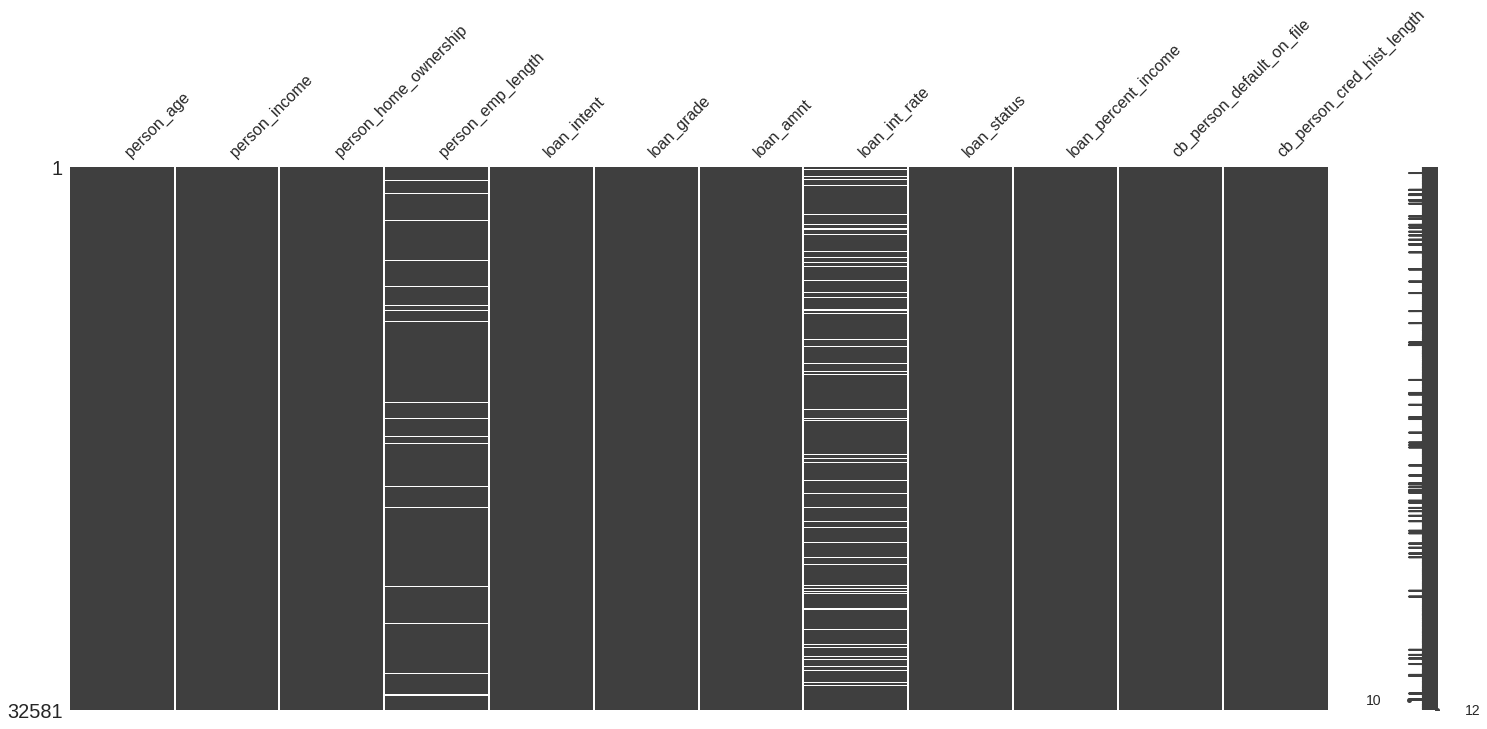

In [ ]:
#Utilizacion de libreria missingno para visualizar valores NULL.
msno.matrix(df)
plt.show()

In [ ]:
nulos_emp_length = df[df['person_emp_length'].isnull()]
nulos_emp_length.head(5)
#Aca entendemos que los valores nulos corresponden a personas que estan recien ingresados en su nuevo trabajo

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [ ]:
#Lo llenamos con 0 dado que tienen nula antiguedad en su trabajo segun los datos

df['person_emp_length']=df['person_emp_length'].fillna(0)

In [ ]:
#En tanto que para los nulos de tasa de interes, calcule la mediana del resto de la base de datos y aplicamos dicho numero a los nulos

#opte por utilizar la mediana dado que cuando los datos no se ajustan a una distribución normal es más correcto utilizar la mediana.
#Esto es así­ porque la mediana es mucho más robusta, lo que quiere decir que se afecta menos por la presencia de sesgos en la distribución o de valores extremos.
df['loan_int_rate'].median()
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [ ]:
#corrobore no tener ningun nulo luego de las modificaciones
pd.options.display.max_rows = None
df.isnull().sum().sort_values()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
#Tipo de datos en cada columna
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [ ]:
#se grafica y describe con colores gradientes para visualizar posibles outliers
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,66074.848470,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,61983.119168,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6000000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


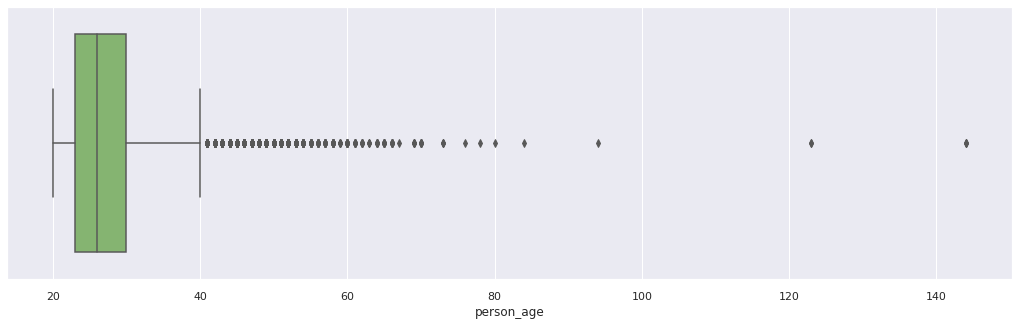

In [ ]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_age"], palette="summer")

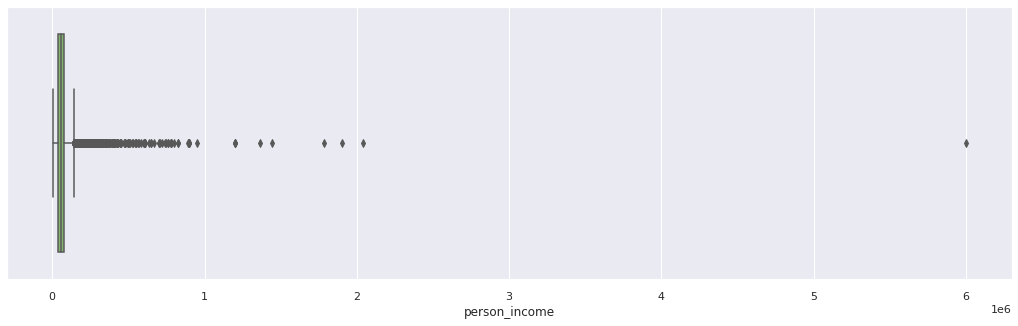

In [ ]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_income"], palette="summer")

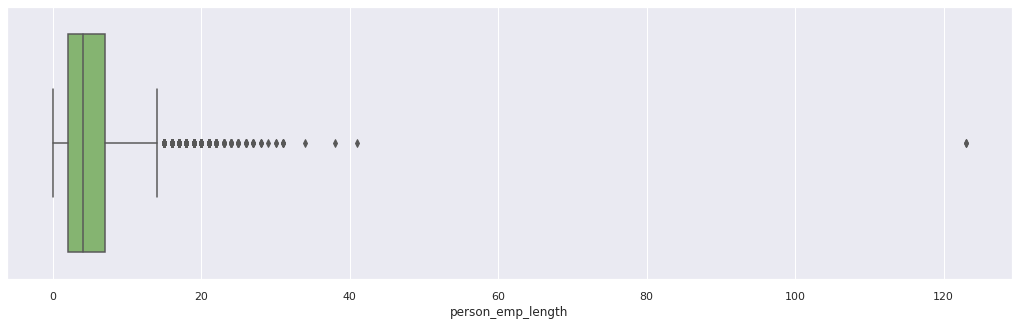

In [ ]:
sns.boxplot(df["person_emp_length"], palette="summer")


In [ ]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le coloco un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_age'] <= 80]
df['person_age'].max()


80

In [ ]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le coloco un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_income'] <= 800000]
df['person_income'].max()

800000

In [ ]:
#Debido a la presencia de outliers en edad, duracion en el empleo e ingreso, le coloco un máximo de 80 años para los solicitantes de crédito, de 800.000 anuales al ingreso y de 30 años de duración en el empleo

df = df[df['person_emp_length'] <= 30]
df['person_emp_length'].max()

30.0

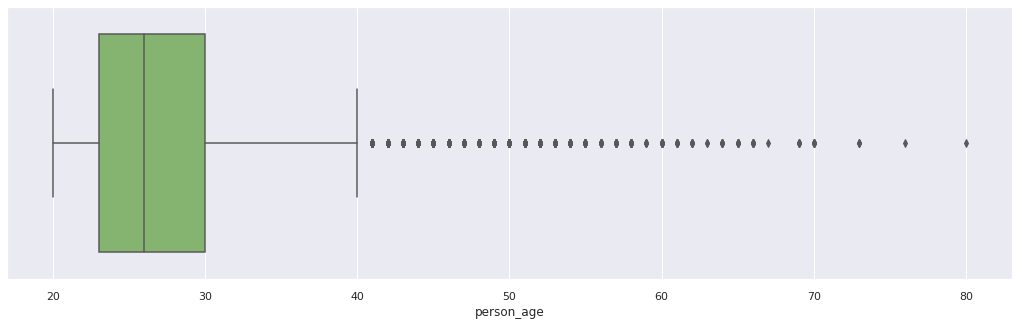

In [ ]:
#Grafico nuevamente para observar como quedan las variables tras el trabajo con los outliers

sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_age"], palette="summer")

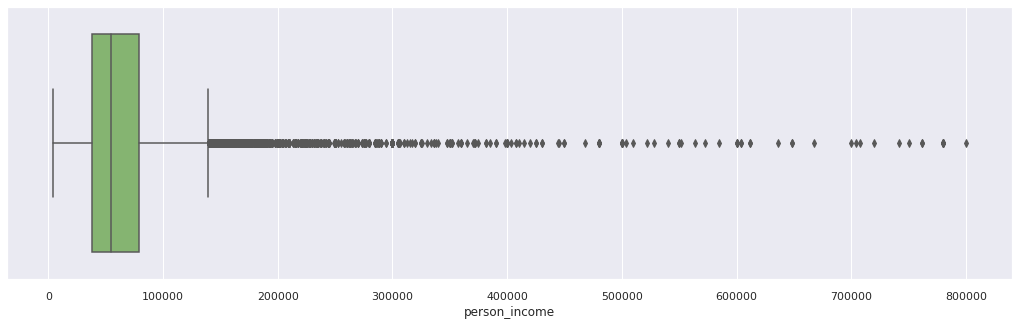

In [ ]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_income"], palette="summer")

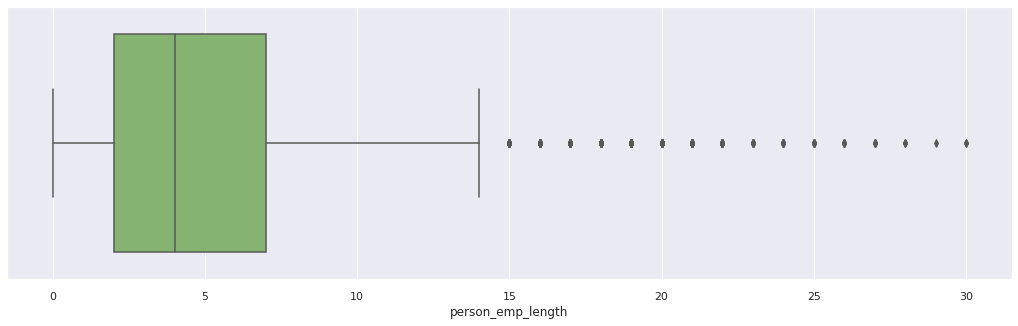

In [ ]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df["person_emp_length"], palette="summer")

**CONCLUSIONES DATA WRANGLING**

-Trabajé con un conjunto de datos que consta de 32,051 registros y 12 columnas, cada una representando atributos de clientes. Durante el proceso, identifiqué valores faltantes en las variables "loan_int_rate" (tasa de interés del crédito) y "person_emp_length" (antigüedad del cliente en su trabajo).

En el caso de la tasa de interés del crédito, observé que los valores faltantes representaban casi el 9.5% de la base de datos. Dado que la distribución no era normal, decidí calcular la mediana de la variable y aplicarla a los valores faltantes. En cuanto a la antigüedad del cliente en su trabajo, opté por asignar un valor de 0 a los valores faltantes, asumiendo que se trataba de personas recién ingresadas en sus empleos. En este caso, los valores faltantes ascendían a un poco más del 2% del total.

Además, detecté valores atípicos (outliers) en las variables "person_age" (edad del cliente), "person_income" (ingreso anual del cliente) y "person_emp_length" (antigüedad del cliente en su trabajo). Luego de visualizar estos valores en gráficos y considerando el perfil de los clientes a los que brindamos servicio, realicé ajustes individuales:

Establecí un límite máximo de 80 años para la variable de edad, ya que no estábamos interesados en clientes mayores.

Fijé un ingreso anual máximo de 800,000 USD, informando a los clientes que superaran este umbral que podrían acceder a un estatus premium, con la posibilidad de obtener préstamos casi automáticos. Sin embargo, se indicó que se verificaría detalladamente su situación financiera global.

Para la antigüedad en el trabajo, decidí establecer un límite máximo de 30 años, considerando la relevancia de este atributo en el análisis.

# **Análisis Exploratorio de Datos (EDA)**

Una vez que tenemos la base de datos limpia y curada, realizamos un segundo análisis de los datos, con foco en nuestra variable target (loan_status) dado que nuestro objetivo será conocer si un crédito entrará en default o no.

In [ ]:
#el estado de los créditos
df.loan_status.value_counts() / len(df) * 100


0    78.1683
1    21.8317
Name: loan_status, dtype: float64

In [ ]:
#el estado de los créditos
ex.pie(df,names='loan_status',title='Loan Status',hole=0.33)



In [ ]:
#el destino de los créditos
ex.pie(df,names='loan_intent',title='Loan Intent',hole=0.33)

In [ ]:
#Mi enfoque principal radicó en determinar si un crédito entraría en default o no. Para ello, exploré las principales correlaciones con el estado del crédito, considerando individualmente cada variable. A continuación, se detallan las acciones tomadas:

Tasa de Interés del Crédito (loan_int_rate):

Dado que esta variable es crucial, calculé la mediana para los valores faltantes (aproximadamente el 9.5% de la base) debido a su distribución no normal.
Antigüedad del Cliente en su Trabajo (person_emp_length):

Asigné un valor de 0 a los valores faltantes (un poco más del 2% del total), considerando que podrían ser personas recién ingresadas en sus empleos.
Valores Atípicos (Outliers):

Identifiqué y gestioné los valores atípicos en "person_age" (edad del cliente), "person_income" (ingreso anual del cliente) y "person_emp_length" (antigüedad en el trabajo).
Establecí límites: 80 años para la edad, 800,000 USD como ingreso anual máximo y 30 años como antigüedad laboral máxima.
Estas acciones buscan optimizar el conjunto de datos para analizar las correlaciones esenciales con el estado del crédito y, por ende, mejorar la capacidad predictiva en cuanto a la probabilidad de que un crédito entre en default.
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379115
loan_int_rate                 0.319328
loan_amnt                     0.105439
cb_person_cred_hist_length   -0.014710
person_age                   -0.019749
person_emp_length            -0.090523
person_income                -0.188815
dtype: float64

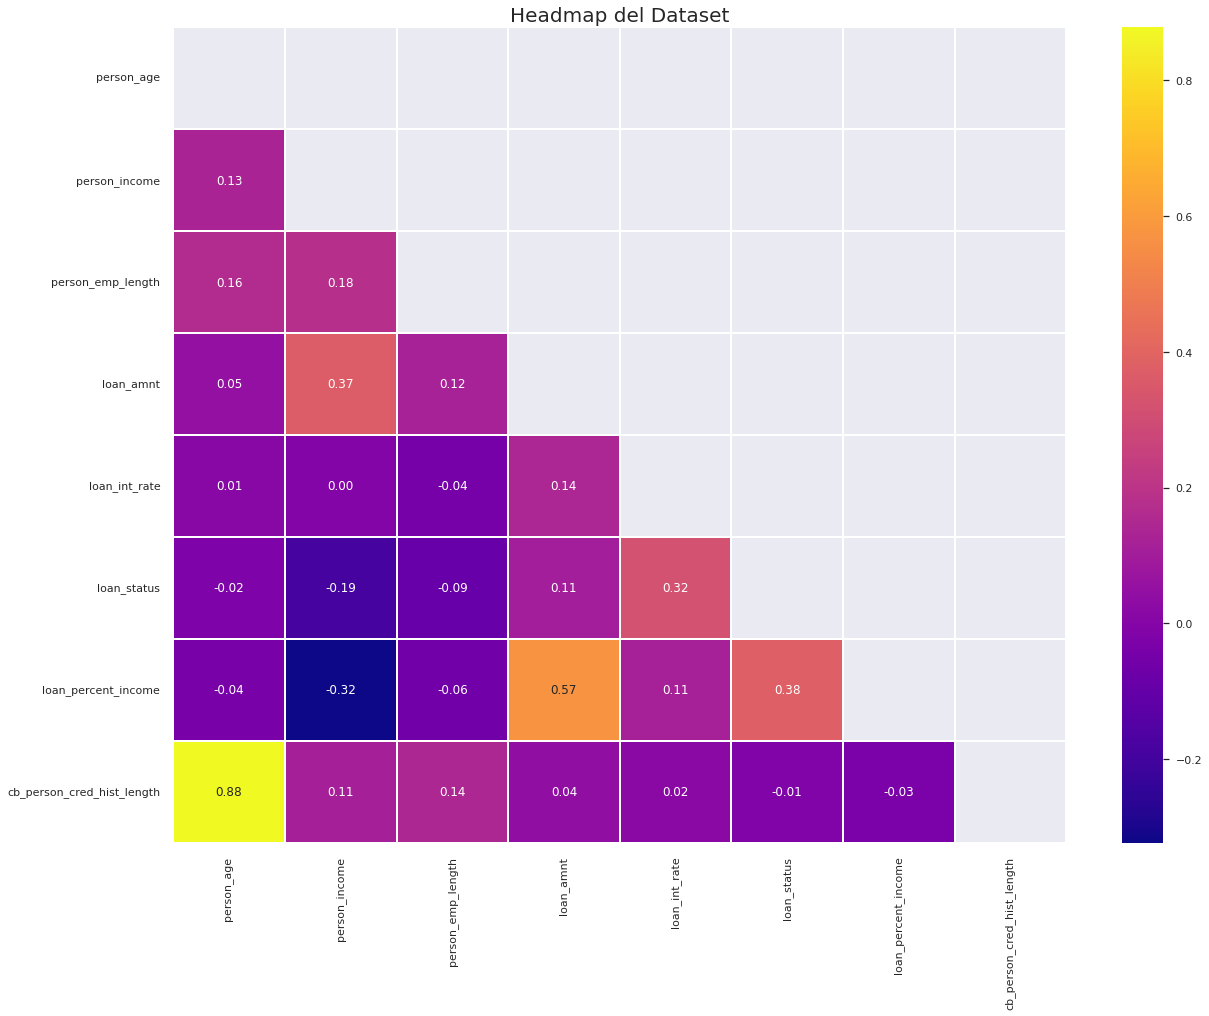

In [ ]:
plt.rcParams['figure.figsize'] = (20,15)
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.title('Headmap del Dataset', fontsize = 20)
plt.show()

In [ ]:
#Calcule la media de edad de los clientes
df['person_age'].mean()

27.701404036990382

In [ ]:
#Calcule el monto medio del crédito
df['loan_amnt'].mean()

9586.811422777966

In [ ]:
#Calcule el % de créditos por calidad del mismo
df['loan_grade'].value_counts('0')

A    0.330794
B    0.320716
C    0.198193
D    0.111309
E    0.029617
F    0.007404
G    0.001966
Name: loan_grade, dtype: float64

In [ ]:
#Calcule si los clientes son dueños de su casa, alquilan o tienen una hipoteca
df['person_home_ownership'].value_counts('0')

RENT        0.504962
MORTGAGE    0.412424
OWN         0.079327
OTHER       0.003287
Name: person_home_ownership, dtype: float64

In [ ]:
#Le doy nombre a 1 y 0, como deudor y no deudor

debtor = df[df['loan_status'] == 1]
no_debtor = df[df['loan_status'] == 0]

In [ ]:
#se muestra donde gastan el dinero obtenido aquellos clientes que no estan al día (deudores)

fig1 = px.histogram(debtor,x='loan_intent',color='loan_intent', template = "plotly_white")
fig1.show()

In [ ]:
#se observa que la mayor cantidad de deudores es gente menor a 30 años

fig2 = px.histogram(debtor,x='person_age',color='person_age',template='plotly_white')
fig2.show()

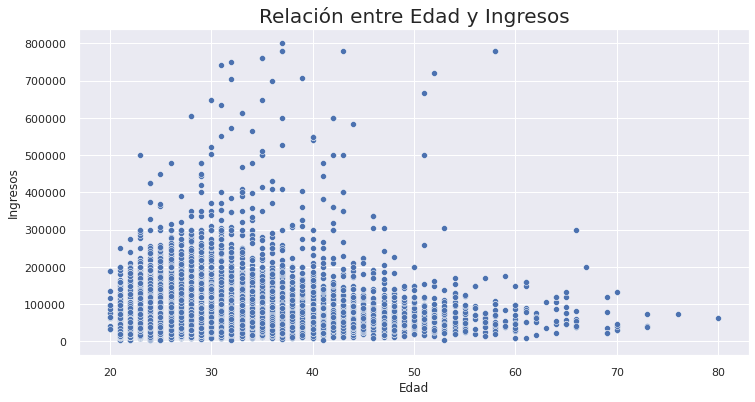

In [ ]:
#evidencie la relación entre la edad y los ingresos
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['person_age'], y = df['person_income'], palette = 'cubehelix')
VariableX="Edad"
VariableY="Ingresos"
plt.title(f'Relación entre {VariableX} y {VariableY}', fontsize = 20)
plt.xlabel(VariableX)
plt.ylabel(VariableY)
plt.show()


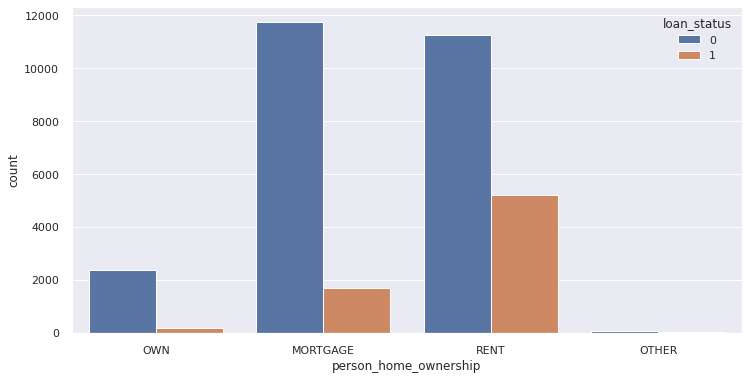

In [ ]:
#se ve la relacion entre el status de credito y la propiedad de sus viviendas (dueños, hipotecas, alquila y otros)
plt.figure(figsize=(12,6))


sns.countplot('person_home_ownership',hue="loan_status",data=df)


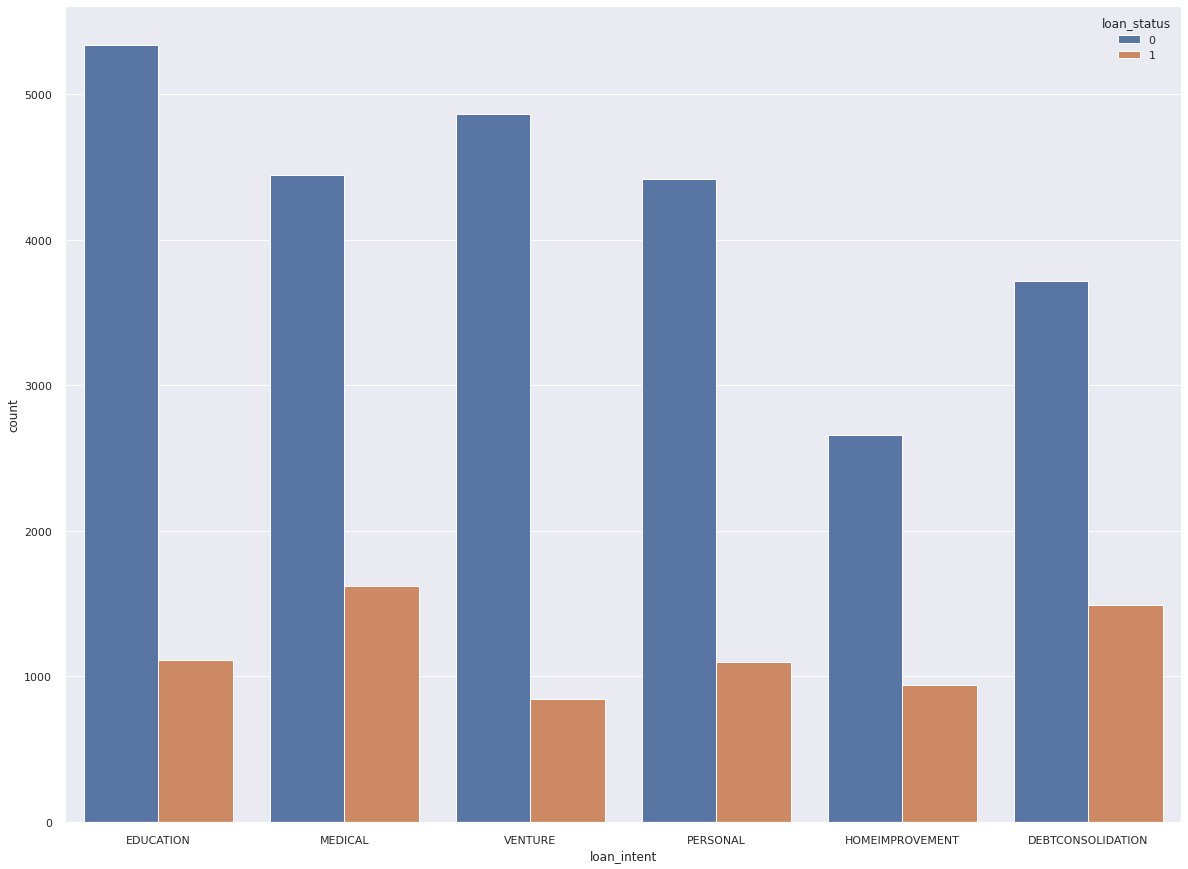

In [ ]:
#Ahora vemos la relación del status de crédito respecto al destino gastado
sns.countplot('loan_intent',data=df,hue="loan_status")


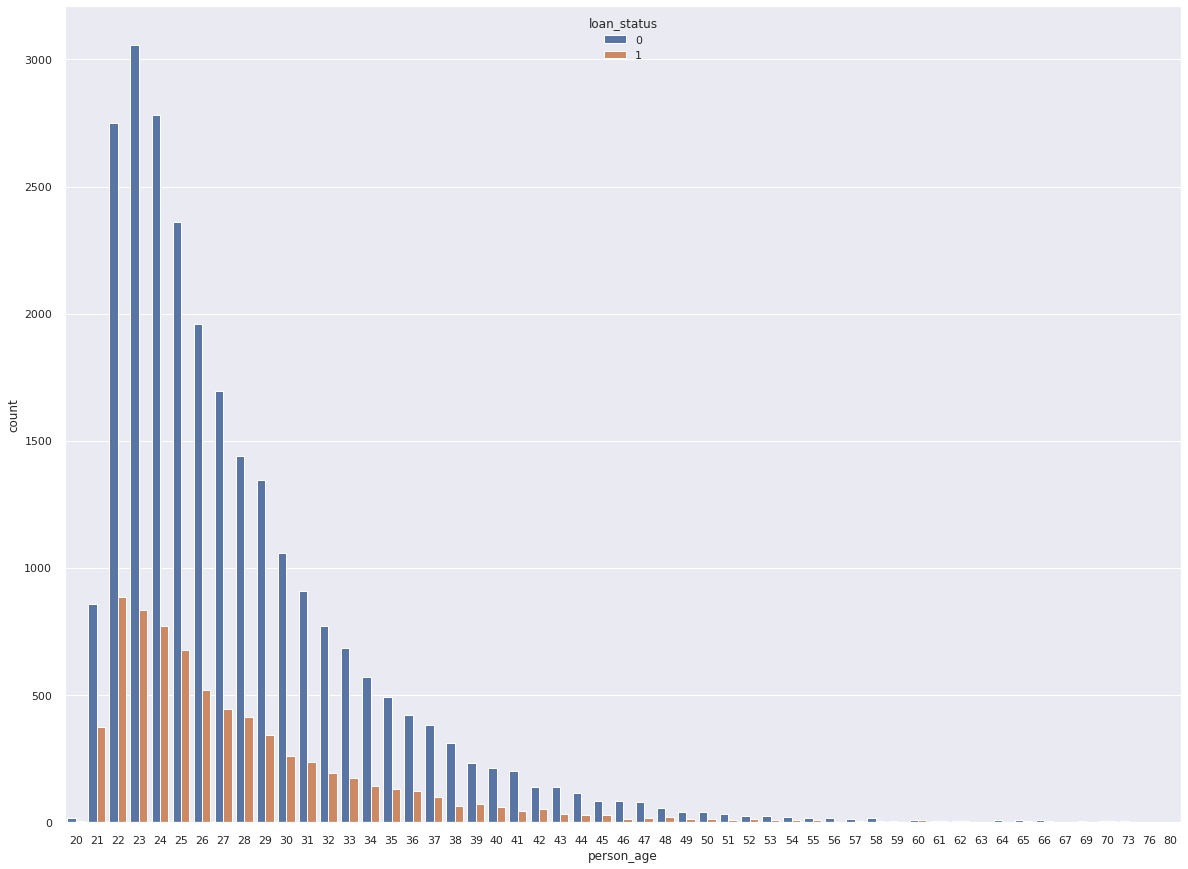

In [ ]:
#Seguimos relacionando, y en este caso con la edad
sns.countplot('person_age',hue="loan_status",data=df)

In [ ]:
cross_col = pd.crosstab(index = df['loan_intent'], columns = df['loan_status'], 
            normalize='index').round(4) * 100

cross_col

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.40,28.60
EDUCATION,82.77,17.23
HOMEIMPROVEMENT,73.88,26.12
MEDICAL,73.28,26.72
PERSONAL,80.10,19.90
VENTURE,85.17,14.83


**CONCLUSIONES EDA**

Tras aplicar diversos análisis, incluyendo univariado, bivariado y multivariado, he llegado a conclusiones fundamentales sobre el actual mercado de créditos:

Estado del Crédito:

Aproximadamente el 78% de los individuos mantiene sus créditos al día, mientras que el 22% presenta algún tipo de deuda (default).
Destino de los Créditos:

El destino de los créditos se distribuye de manera equitativa, destacándose principalmente en educación (20%), cuestiones médicas (19%) y emprendimiento (17.5%).
Correlaciones Negativas:

Las variables person_income, person_emp_length y person_age muestran correlación negativa con el estado del crédito. Mayores ingresos, duración en el empleo y edad de la persona indican menor riesgo crediticio.
Correlaciones Positivas:

En contraste, las variables loan_percent_income, loan_int_rate y loan_amnt exhiben correlación positiva con el estado del crédito. Mayores valores en estas variables aumentan las posibilidades de caer en default.
Características Demográficas:

La edad promedio de los clientes es de 27-28 años, en línea con el destino principal de préstamos en educación.
El monto medio de los créditos es de 9587 USD.
Calidad del Crédito:

Clasificando A y B como calidad alta, C y D como calidad media, y E, F y G como calidad baja, el 65% se encuentra en calidad alta, el 31% en calidad media y el 4% en calidad baja.
Situación de Vivienda:

Más del 50% de los clientes alquilan su vivienda, un 41% paga una hipoteca y solo el 8% es dueño pleno de su hogar.
Análisis de Deudores y No Deudores:

Los clientes deudores destinan préstamos principalmente a cuestiones médicas y consolidación de deuda.
Los deudores tienden a ser jóvenes, sugiriendo una relación entre la edad y el ingreso anual.
Aquellos que alquilan o pagan una hipoteca tienen mayor presencia en la categoría de deudores, mientras que los propietarios de viviendas son cumplidores excepcionales.
Destino del Préstamo y Default:

El destino de emprendimiento muestra el porcentaje más bajo de default (solo un 14% de incumplimiento).
Préstamos destinados a la consolidación de deuda son los más propensos al default (un 26% de incumplimiento).
Estas conclusiones ofrecen una visión integral y profesional del panorama crediticio, proporcionando información valiosa para la toma de decisiones y estrategias futuras.








# **Preparación de Datos y Definición de Variable Target**

In [ ]:
#Separe el dataframe con las variables numericas y las categoricas
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')

In [ ]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:


#Se ha realizado un escalado para la normalización de los datos
scaler = MinMaxScaler()
df_dummy_sca = scaler.fit_transform(df_dummy)
df_dummy_sca = pd.DataFrame(df_dummy_sca)
df_dummy_sca.columns = df_dummy.columns
df_dummy_sca.head(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.016667,0.007035,0.166667,0.014493,0.321348,0.0,0.120482,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.083333,0.007035,0.033333,0.144928,0.418539,1.0,0.686747,0.035714,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.050000,0.077261,0.133333,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.066667,0.063317,0.266667,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.016667,0.007412,0.066667,0.057971,0.096629,1.0,0.301205,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Separe los datos de entrada de la salida
X = df_dummy_sca.drop('loan_status', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.loan_status #Defino el Target